#### PPGIA - Unifor - Prof. Daniel - Processamento e analise de imagens digitais - Trabalho09 - Classificação de Caracteres em Japonês, Chines e Coreano

#### Importação de Bibliotecas

In [15]:
import numpy as np
import pandas as pd
import cv2 
print(cv2.__version__)
#Path Google Colab para CV2
from google.colab.patches import cv2_imshow
from google.colab import files
import dlib
from skimage import io
from PIL import Image 
%matplotlib inline
#A linha acima é necessária para mostrar gráficos Matplotlib dentro de um Notebook Jupyter
from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import sys
import ipywidgets as widgets
from IPython.display import display
import scipy
from scipy import interpolate
#import face_recognition
import pickle
import gzip

4.1.2


In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

#### Upload do arquivo

In [ ]:
#Upload do arquivo de imagens que será utilizado no exemplo (lena.png)
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.pickle to dataset.pickle
User uploaded file "dataset.pickle" with length 7686353 bytes


In [6]:
with gzip.open('/content/dataset.pickle','rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [62]:
class_names = ['Coreano', 'Chines', 'Japones']

In [7]:
x_train.shape

(14672, 64, 64)

In [8]:
y_train.shape

(14672,)

In [9]:
x_test.shape

(3669, 64, 64)

In [10]:
y_test.shape

(3669,)

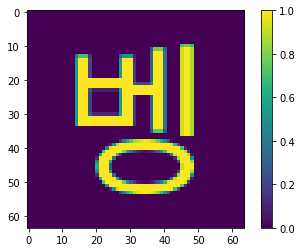

In [59]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
x_train = x_train / 255.0

x_test = x_test / 255.0

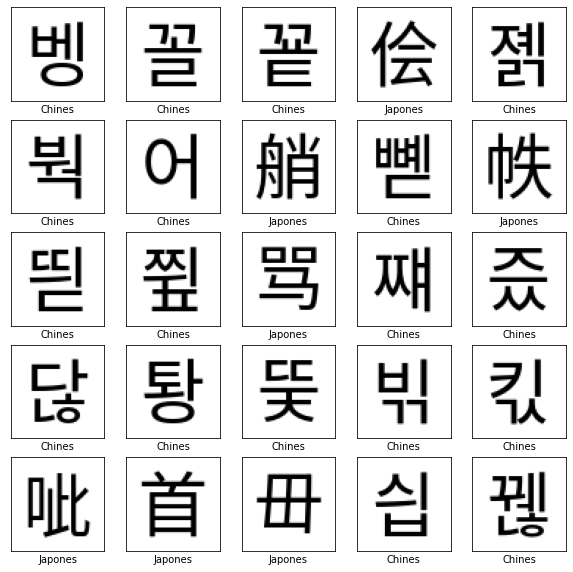

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


459/459 [==============================] - 3s 6ms/step - loss: 0.0403 - accuracy: 0.9853
Epoch 2/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0113 - accuracy: 0.9960
Epoch 3/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 4/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 5/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 6/10
459/459 [==============================] - 3s 6ms/step - loss: 6.7859e-04 - accuracy: 0.9999
Epoch 7/10
459/459 [==============================] - 3s 6ms/step - loss: 2.2827e-04 - accuracy: 1.0000
Epoch 8/10
459/459 [==============================] - 3s 6ms/step - loss: 1.5895e-04 - accuracy: 1.0000
Epoch 9/10
459/459 [==============================] - 3s 6ms/step - loss: 1.2747e-04 - accuracy: 1.0000
Epoch 10/10
459/459 [==============================] - 3s 6ms/step - loss: 1.0774e-04 - accurac

In [33]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


115/115 - 1s - loss: 0.0095 - accuracy: 0.9975

Test accuracy: 0.9975470304489136


In [34]:
predictions = model.predict(x_test)

In [35]:
predictions[0]

array([2.3463543e-16, 4.5306619e-15, 1.0000000e+00, 4.6090030e-22,
       1.5157373e-21, 3.0643258e-22, 3.6905358e-21, 3.2267617e-21,
       4.0364152e-19, 3.1959434e-19], dtype=float32)

In [36]:
np.argmax(predictions[0])

2

In [37]:
x_test[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

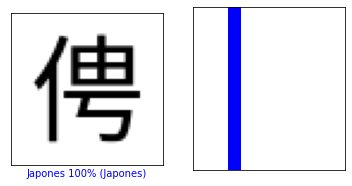

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

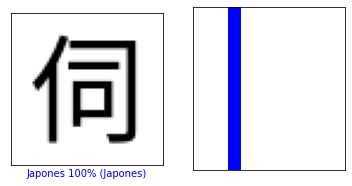

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

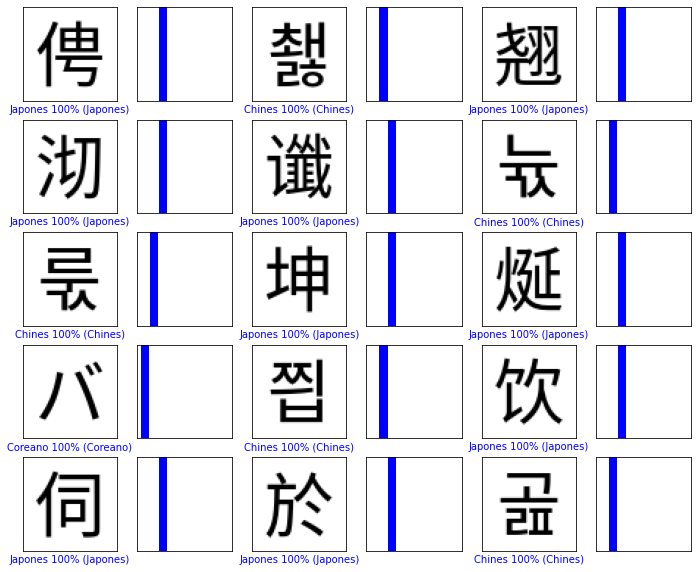

In [66]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [50]:
# Grab an image from the test dataset.
img = x_test[0]

print(img.shape)

(64, 64)


In [51]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 64, 64)


In [52]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.3463543e-16 4.5306793e-15 1.0000000e+00 4.6089682e-22 1.5157373e-21
  3.0643374e-22 3.6905216e-21 3.2267617e-21 4.0364152e-19 3.1959434e-19]]


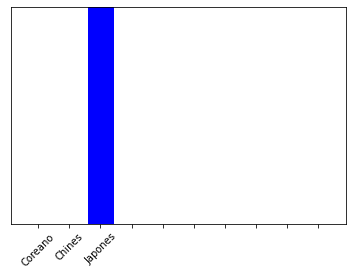

In [67]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [55]:
np.argmax(predictions_single[0])

2